# Recreation.gov Reservations - 2021
Reservation data for Recreation.gov is published in [Recreational Information Database](ridb.recreation.gov)

The 2021 dataset is available [here](https://ridb.recreation.gov/downloads/reservations2021.zip)

In [64]:
import pandas as pd

dfReservations2021 = pd.read_csv('./raw/FY21 Historical Reservations Full.csv')
dfReservations2021.shape

/Users/natburgwyn/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,11,12,13,15,17,29,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(8354633, 35)

In [65]:
dfReservations2021.dtypes

historicalreservationid     object
ordernumber                 object
agency                      object
orgid                      float64
codehierarchy               object
regioncode                  object
regiondescription           object
parentlocationid            object
parentlocation              object
legacyfacilityid           float64
park                        object
sitetype                    object
usetype                     object
productid                   object
inventorytype               object
facilityid                  object
facilityzip                float64
facilitystate               object
facilitylongitude          float64
facilitylatitude           float64
customerzip                 object
tax                        float64
usefee                     float64
tranfee                    float64
attrfee                    float64
totalbeforetax             float64
discount                   float64
totalpaid                  float64
startdate           

In [66]:
dfReservations2021.head()

,historicalreservationid,ordernumber,agency,orgid,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,legacyfacilityid,...,totalbeforetax,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,equipmentlength
0,edd9085a-a89f-4787-b9ec-e0794e5ac1b4,0201638440-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,58.0,0.0,58.0,2020-10-08 00:00:00.000,2020-10-10 00:00:00.000,2020-09-10 09:16:58.400,2 days,1.0,NaN,0.0
1,1d1d4d6a-3d57-47d0-9212-d9a4411555c0,0202157822-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,33.0,0.0,33.0,2020-10-23 00:00:00.000,2020-10-24 00:00:00.000,2020-09-28 23:22:18.538,1 day,2.0,NaN,0.0
2,bca72357-5824-4484-9eac-a824f5c00622,0208506393-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,33.0,0.0,33.0,2020-10-02 00:00:00.000,2020-10-03 00:00:00.000,2020-09-19 01:03:11.146,1 day,0.0,NaN,0.0
3,cbf1ce58-fb2a-4605-9474-cf27f1ce4052,0208506393-2,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,25.0,0.0,25.0,2020-10-03 00:00:00.000,2020-10-04 00:00:00.000,2020-09-19 01:03:11.146,1 day,2.0,NaN,0.0
4,b3e1899a-aa31-4948-8d47-29af5f6ea85f,0217769313-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,18.0,0.0,18.0,2020-10-10 00:00:00.000,2020-10-11 00:00:00.000,2020-09-16 19:57:02.020,1 day,0.0,NaN,0.0


In [67]:
# columns in dataframe
list(dfReservations2021)

['historicalreservationid',
 'ordernumber',
 'agency',
 'orgid',
 'codehierarchy',
 'regioncode',
 'regiondescription',
 'parentlocationid',
 'parentlocation',
 'legacyfacilityid',
 'park',
 'sitetype',
 'usetype',
 'productid',
 'inventorytype',
 'facilityid',
 'facilityzip',
 'facilitystate',
 'facilitylongitude',
 'facilitylatitude',
 'customerzip',
 'tax',
 'usefee',
 'tranfee',
 'attrfee',
 'totalbeforetax',
 'discount',
 'totalpaid',
 'startdate',
 'enddate',
 'orderdate',
 'nights',
 'numberofpeople',
 'equipmentdescription',
 'equipmentlength']

## Observations

- `historicalreservationid` - this is a GUID, which is not helpful
- `ordernumber` - this is hyphenated, ie 1234-2, which looks like versions of a single order
- `codehierarchy` - pipe-delimited, appears to be for internal reporting
- `parentlocationid` and `parentlocation` - duplicative
- `legacyfacilityid` - legacy unique identifier
- `park` - duplicative
- `sitetype`, `usetype`, `productid`, `inventorytype` - type of transaction information
- `facility` - geographic information on multiple dimensions
- `customerzip` - likely customer dimension
- `nights` - format of X day(s), likely derived from `enddate` - `startdate`
- `equipmentdescription` and `equipmentlength` - not applicable

In [68]:
# drop columns that won't impact research
dfReservations2021.drop(columns=['historicalreservationid', 'regioncode', 'regiondescription', 'parentlocation', 'codehierarchy', 'legacyfacilityid', 'tax', 'usefee', 'tranfee', 'attrfee', 'totalbeforetax', 'discount', 'equipmentdescription', 'equipmentlength'], inplace=True)

## Order Number

The `ordernumber` field displays as `XXX-Y` where `XXX` is a unique order transaction and `Y` is a version number.  This means that there are likely duplicate orders in the original dataset.  The goal is to reduce this down to just the max version `Y` for each order.

To accomplish this:
- Split `ordernumber` into two distinct fields: `orderno` and `orderversion`
- Drop duplicate `orderno` values using max `orderversion`

In [69]:
# https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns
dfReservations2021[['orderno', 'orderversion']] = dfReservations2021['ordernumber'].str.split('-', 1, expand=True)

In [70]:
dfReservations2021.head()

,ordernumber,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,...,facilitylatitude,customerzip,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,orderno,orderversion
0,0201638440-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,99821,CAMPING,252494,...,65.427497,NaN,58.0,2020-10-08 00:00:00.000,2020-10-10 00:00:00.000,2020-09-10 09:16:58.400,2 days,1.0,0201638440,1
1,0202157822-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99709,33.0,2020-10-23 00:00:00.000,2020-10-24 00:00:00.000,2020-09-28 23:22:18.538,1 day,2.0,0202157822,1
2,0208506393-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99706,33.0,2020-10-02 00:00:00.000,2020-10-03 00:00:00.000,2020-09-19 01:03:11.146,1 day,0.0,0208506393,1
3,0208506393-2,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99706,25.0,2020-10-03 00:00:00.000,2020-10-04 00:00:00.000,2020-09-19 01:03:11.146,1 day,2.0,0208506393,2
4,0217769313-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99709,18.0,2020-10-10 00:00:00.000,2020-10-11 00:00:00.000,2020-09-16 19:57:02.020,1 day,0.0,0217769313,1


In [71]:
# what is the order with the most revisions?
dfReservations2021[['orderno', 'orderversion']].max()

orderno         499981626.0
orderversion            9.0
dtype: float64

In [72]:
# drop duplicates, keeping max orderversion
dfReservations2021.drop_duplicates(subset=['orderno'], keep='last', inplace=True)

In [73]:
# review new dataframe
dfReservations2021.shape

(7355532, 23)

## Nights

The dataset include a nights field which is a string that displays `x days`.  Somewhat confusing, but even moreso when looking at all the different values.

In [74]:
# display all the unique nights values
dfReservations2021['nights'].unique()

array(['2 days', '1 day', '3 days', '8 days', '00:00:00', '21 days',
       '29 days', '30 days', '23 days', '9 days', '-2 days', '22 days',
       '4 days', nan, '-1 days -14:47:10.998269', '5 days', '7 days',
       '14 days', '13 days', '6 days', '10 days', '12 days', '11 days',
       '35 days', '16 days', '17 days', '26 days', '58 days', '32 days',
       '-20 days', '-21:55:08.125762', '364 days', '19 days', '129 days',
       '27 days', '18 days', '-5 days', '-13 days', '-19 days', '-3 days',
       '142 days', '-4 days', '40 days', '15 days', '106 days', '-6 days',
       '24 days', '-1 days', '42 days', '-12 days', '33 days', '211 days',
       '62 days', '36 days', '31 days', '-10 days', '-22 days', '50 days',
       '377 days', '372 days', '374 days', '370 days', '368 days',
       '390 days', '375 days', '379 days', '386 days', '383 days',
       '373 days', '380 days', '385 days', '392 days', '371 days',
       '376 days', '365 days', '393 days', '366 days', '391 days',
  

Based upon the unique values above, it is clear that this field will require further cleaning.

In [75]:
# function to return 
def format_nights(night_str):
    try:
        result = night_str.split(' ')
        return int(result[0])
    except:
        return 0

In [76]:
# execute a basic 'unit test' to validate function
format_nights('6 days')

6

In [77]:
# apply format_nights fucntion to create new clean column
dfReservations2021['cleannights'] = dfReservations2021.apply(lambda x: format_nights(x['nights']), axis=1)

In [78]:
# cast date fields to datetimes
dfReservations2021['startdate'] = pd.to_datetime(dfReservations2021['startdate'], errors='coerce')
dfReservations2021['enddate'] = pd.to_datetime(dfReservations2021['enddate'], errors='coerce')
dfReservations2021['orderdate'] = pd.to_datetime(dfReservations2021['orderdate'], errors='coerce')

In [79]:
# calculate difference between enddate and startdate amd store in a new field
dfReservations2021['datediff'] = (dfReservations2021.enddate - dfReservations2021.startdate).dt.days

In [80]:
# display unique date differences
dfReservations2021['datediff'].unique()

array([   2.,    1.,    3.,    8.,    0.,   21.,   29.,   30.,   23.,
          9.,   -2.,   22.,    4.,   nan,    5.,    7.,   14.,   13.,
          6.,   10.,   12.,   11.,   35.,   16.,   17.,   26.,   58.,
         32.,  -20.,   -1.,  364.,   19.,  129.,   27.,   18.,   -5.,
        -13.,  -19.,   -3.,  142.,   -4.,   40.,   15.,  106.,   -6.,
         24.,   42.,  -12.,   33.,  211.,   62.,   36.,   31.,  -10.,
        -22.,   50.,  377.,  372.,  374.,  370.,  368.,  390.,  375.,
        379.,  386.,  383.,  373.,  380.,  385.,  392.,  371.,  376.,
        365.,  393.,  366.,  391.,  394.,  381.,  367.,  384.,  389.,
        378.,  388.,  387.,  382.,  395.,  369.,  -44.,   -9.,   52.,
         53.,   88.,  156.,   37.,   71.,  357.,  121.,   39.,  -40.,
         93.,   81.,   49.,   44.,   80.,   45.,   51.,   38.,  128.,
         72.,   43.,  -25.,  -34.,   91.,  -18.,   55., -146.,  119.,
       -110.,  149.,   64.,   25.,  135.,  176.,  113.,  141.,  125.,
        127.,  114.,

In [81]:
# compare the cleannights and datediff
dfReservations2021[dfReservations2021['cleannights'] != dfReservations2021['datediff']]

,ordernumber,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,...,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,orderno,orderversion,cleannights,datediff
11020,0347702136-1,BLM,126.0,10071676,Wire Pass Day Use,NaN,Activity,10006177,ACTIVITYPASS,10006177,...,13.0,2021-03-18 00:00:00.000,NaT,2021-03-18 17:01:26.445,NaN,NaN,0347702136,1,0,NaN
11225,0349335607-1,BLM,126.0,10071676,Wire Pass Day Use,NaN,Activity,10006177,ACTIVITYPASS,10006177,...,19.5,2021-04-29 00:00:00.000,NaT,2021-04-29 14:02:14.069,NaN,NaN,0349335607,1,0,NaN
12192,0356848903-1,BLM,126.0,10071676,Wire Pass Day Use,Day Use Fee,Activity,10006177,ACTIVITYPASS,10006177,...,0.0,2021-04-29 14:47:10.998,2021-04-28,2021-04-28 16:32:13.719,-1 days -14:47:10.998269,NaN,0356848903,1,-1,-2.0
15701,0384508796-1,BLM,126.0,10071676,Wire Pass Day Use,NaN,Activity,10006177,ACTIVITYPASS,10006177,...,6.5,2021-05-21 00:00:00.000,NaT,2021-05-21 19:02:05.773,NaN,NaN,0384508796,1,0,NaN
16179,0388042251-1,BLM,126.0,10071676,Wire Pass Day Use,NaN,Activity,10006177,ACTIVITYPASS,10006177,...,26.0,2021-04-04 00:00:00.000,NaT,2021-04-04 20:00:00.432,NaN,NaN,0388042251,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354279,0398840844-1,NaN,NaN,NaN,NaN,NaN,Overnight,3276,NaN,NaN,...,10.0,2020-10-28 00:00:00.000,NaT,NaT,NaN,NaN,0398840844,1,0,NaN
8354280,0398904354-1,NaN,NaN,NaN,NaN,NaN,Overnight,18135,NaN,NaN,...,18.0,2020-12-10 00:00:00.000,NaT,NaT,NaN,NaN,0398904354,1,0,NaN
8354281,0399219470-1,NaN,NaN,NaN,NaN,NaN,Overnight,55302,NaN,NaN,...,98.0,2020-12-19 00:00:00.000,NaT,NaT,NaN,NaN,0399219470,1,0,NaN
8354282,0399746669-1,NaN,NaN,NaN,NaN,NaN,Overnight,10068609,NaN,NaN,...,23.0,2020-10-23 00:00:00.000,NaT,NaT,NaN,NaN,0399746669,1,0,NaN


### Zip Code

Zip code is a primary dimension for grouping users.

In [82]:
# explore unique zip codes
len(dfReservations2021['customerzip'].unique())

84687

In [83]:
# drop records with no zip code
dfReservations2021.dropna(subset=['customerzip'], inplace=True)

In [84]:
# truncate zip to 5 digit value
dfReservations2021['cleanzip'] = dfReservations2021.customerzip.str.extract(r'(\d{5})')

In [85]:
# review results
dfReservations2021['cleanzip']

1          99709
3          99706
4          99709
5          99709
7          84401
           ...  
8354601    98119
8354605    85042
8354611    43235
8354626    85713
8354629    74053
Name: cleanzip, Length: 5696706, dtype: object

In [86]:
# how many unique zip codes?
len(dfReservations2021['cleanzip'].unique())

41985

## Stats

In [87]:
# display unique agencies
dfReservations2021['agency'].unique()

array(['BLM', 'BOR', 'FWS', 'NARA', 'NPS', 'USACE', 'USFS', nan],
      dtype=object)

In [88]:
# display revenue by agency
(dfReservations2021.groupby('agency')['totalpaid'].agg(['sum']).style.format('${0:,.2f}'))

,sum
agency,
BLM,"$5,561,114.74"
BOR,"$468,207.50"
FWS,"$348,823.10"
NARA,"$62,173.00"
NPS,"$48,892,237.27"
USACE,"$50,426,310.28"
USFS,"$63,458,925.73"


In [89]:
# display all spending by inventory type
(dfReservations2021.groupby('inventorytype')['totalpaid'].agg(['sum']).style.format('${0:,.2f}')).limit()

,sum
inventorytype,
ACTIVITYPASS,"$437,450.75"
CAMPING,"$138,689,866.53"
DONATION,$94.00
LOTTERY_CAMPING,"$78,030.00"
LOTTERY_PERMIT,"$1,997,233.00"
LOTTERY_TICKET,"$28,453.00"
PERMIT,"$8,518,354.99"
QUEUE_LOTTERY,"$44,766.00"
RENTAL,"$1,996.00"


## Camping

Camping is the most common and most lucrative transaction in dataset.  This will be the focus for this study, so reducing the dataset to only camping transactions and gathering some summary statistics.

In [90]:
# limit dataframe to just camoing transactions
dfReservations2021 = dfReservations2021[dfReservations2021['inventorytype'] == 'CAMPING']

In [91]:
# display camping revenue by agency
(dfReservations2021.groupby('agency')['totalpaid'].agg(['sum']).style.format('${0:,.2f}'))

,sum
agency,
BLM,"$1,584,150.50"
BOR,"$468,207.50"
FWS,"$221,644.10"
NPS,"$29,315,405.92"
USACE,"$50,354,808.28"
USFS,"$56,739,162.23"


In [92]:
# display camping revenue by park
(dfReservations2021.groupby('park')['totalpaid'].agg(['sum']).style.format('${0:,.2f}'))

,sum
park,
Evans Campground,"$18,703.25"
Gifford Campground,"$24,995.75"
Kamloops Island Campground,"$4,900.50"
(LAKE ALPINE) SILVER TIP CAMPGROUND,"$38,082.62"
(LAKE ALPINE) SILVER VALLEY CAMPGROUND,"$24,722.80"
(Lake Alpine) Backpackers,"$2,468.65"
(Lake Alpine) Lodgepole Campground,"$24,463.01"
(Lake Alpine) Pine Marten,"$49,608.85"
(Lake Alpine) West Shore,"$52,113.70"


### Data Types

Drop nulls and cast columns to correct data type.

In [93]:
# drop nulls
dfReservations2021.dropna(subset=['numberofpeople', 'cleannights', 'cleanzip'], inplace=True)

In [94]:
# cast cleannights as int
dfReservations2021['cleannights'] = pd.to_numeric(dfReservations2021['cleannights'], downcast='integer')

In [95]:
# cast cleanzip to int and store as users
dfReservations2021['user'] = dfReservations2021['cleanzip'].astype('int')

In [96]:
# cast numberofpeople as int
dfReservations2021['numberofpeople'] = pd.to_numeric(dfReservations2021['numberofpeople'], downcast='integer')

## Rating

Collaboritive filtering requires a rating.  Because one does not exist, one will need to be created using the `cleannights` and `numberofpeople`.  The weak premise is that people are voting with their participation, so the two fields will be multiplied.  Zero values will be dropped and a quantile mappign will be applied to generate a rating in the range of 1-5.

First, review disribution of `cleannights` and `numberofpeople`, dropping zero values.  Then, remove exteme outliers outside three standard deviations.  Finally, calculate `participation` (`cleannights` * `numberofpeople`) then apply quantile mapping to create `rating` score of 1-5 and visualize results.

In [97]:
dfReservations2021.cleannights.describe()

count    2.915293e+06
mean     2.782796e+00
std      3.753225e+00
min     -2.980000e+02
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.820000e+02
Name: cleannights, dtype: float64

<AxesSubplot:>

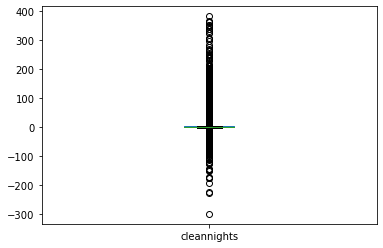

In [98]:
# current nights box plot
dfReservations2021.cleannights.plot.box()

<AxesSubplot:ylabel='Frequency'>

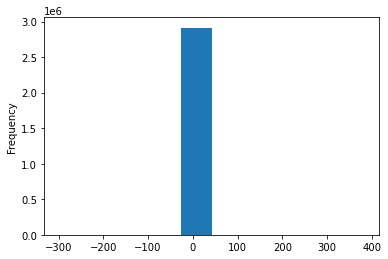

In [99]:
dfReservations2021.cleannights.plot.hist()

In [100]:
# remove negative and zero cleannights
dfReservations2021 = dfReservations2021[dfReservations2021.cleannights > 0]

In [101]:
dfReservations2021.numberofpeople.describe()

count    2.897992e+06
mean     3.798712e+00
std      4.214386e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      2.500000e+02
Name: numberofpeople, dtype: float64

<AxesSubplot:>

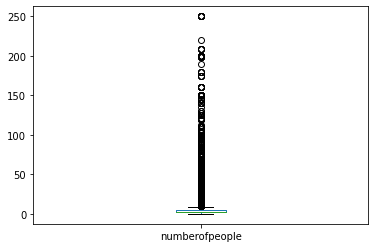

In [102]:
dfReservations2021.numberofpeople.plot.box()

<AxesSubplot:ylabel='Frequency'>

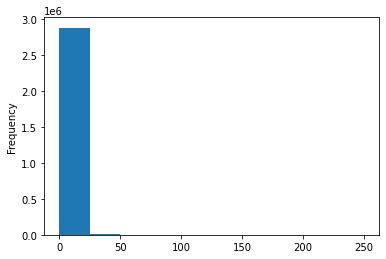

In [103]:
dfReservations2021.numberofpeople.plot.hist()

In [104]:
# remove numberofpeople when zero
dfReservations2021 = dfReservations2021[dfReservations2021.numberofpeople > 0]

In [105]:
import numpy as np

# remove outliers more than 3 standard deviations
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
dfReservations2021 = dfReservations2021[np.abs(dfReservations2021.cleannights - dfReservations2021.cleannights.mean()) <= (3 * dfReservations2021.cleannights.std())]
dfReservations2021 = dfReservations2021[np.abs(dfReservations2021.numberofpeople - dfReservations2021.numberofpeople.mean()) <= (3 * dfReservations2021.numberofpeople.std())]

In [106]:
# calculate a rating value by multiplying numberofpeople and cleannights 
dfReservations2021['participation'] = (dfReservations2021['numberofpeople'] * dfReservations2021['cleannights'])

In [107]:
from sklearn.preprocessing import quantile_transform

# break into quartiles and add 1 to the quartile to generate 1-5 rating
dfReservations2021['rating'] = ((quantile_transform(dfReservations2021['participation'].values.reshape(-1,1), n_quantiles=4) * 4) + 1).astype('int')

<AxesSubplot:>

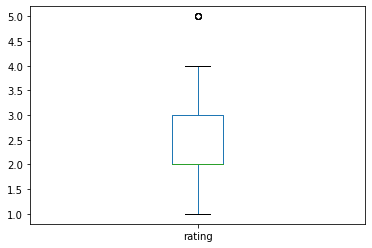

In [108]:
# box plot of rating
dfReservations2021.rating.plot.box()

<AxesSubplot:ylabel='Frequency'>

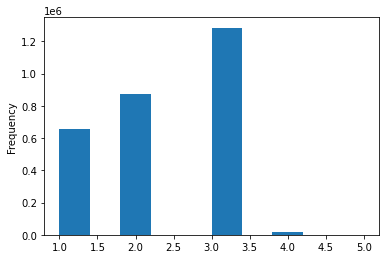

In [109]:
# hitogram of rating
dfReservations2021.rating.plot.hist()

## Revised Dataset

Create a new dataframe for exporting with only the features needed.

In [110]:
# review progress
dfReservations2021.dtypes

ordernumber                  object
agency                       object
orgid                       float64
parentlocationid             object
park                         object
sitetype                     object
usetype                      object
productid                    object
inventorytype                object
facilityid                   object
facilityzip                 float64
facilitystate                object
facilitylongitude           float64
facilitylatitude            float64
customerzip                  object
totalpaid                   float64
startdate            datetime64[ns]
enddate              datetime64[ns]
orderdate            datetime64[ns]
nights                       object
numberofpeople                int16
orderno                      object
orderversion                 object
cleannights                   int16
datediff                    float64
cleanzip                     object
user                          int64
participation               

In [111]:
proposed_features = ['agency',
                     'orgid',
                     'parentlocationid',
                     'park',
                     'sitetype',
                     'usetype',
                     'productid',
                     'inventorytype',
                     'facilityid',
                     'facilityzip',
                     'facilitystate',
                     'facilitylongitude',
                     'facilitylatitude',
                     'startdate',
                     'enddate',
                     'orderdate',
                     'numberofpeople',
                     'cleanzip',
                     'cleannights',
                     'datediff',
                     'participation',
                     'user',
                     'rating']

In [112]:
dfFeatures = dfReservations2021[proposed_features]

In [113]:
dfFeatures.head()

,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,facilityzip,...,startdate,enddate,orderdate,numberofpeople,cleanzip,cleannights,datediff,participation,user,rating
1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,...,2020-10-23,2020-10-24,2020-09-28 23:22:18.538,2,99709,1,1.0,2,99709,1
3,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,...,2020-10-03,2020-10-04,2020-09-19 01:03:11.146,2,99706,1,1.0,2,99706,1
5,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,...,2020-10-09,2020-10-10,2020-09-16 19:48:32.168,1,99709,1,1.0,1,99709,1
7,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,...,2020-10-26,2020-10-27,2020-09-30 18:32:29.447,4,84401,1,1.0,4,84401,2
8,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,...,2020-10-01,2020-10-02,2020-09-28 04:24:31.089,4,99709,1,1.0,4,99709,2


<AxesSubplot:ylabel='Frequency'>

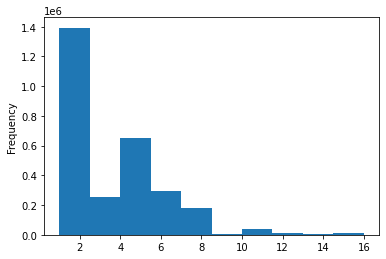

In [114]:
# typical group size
dfFeatures.numberofpeople.plot.hist()

<AxesSubplot:ylabel='Frequency'>

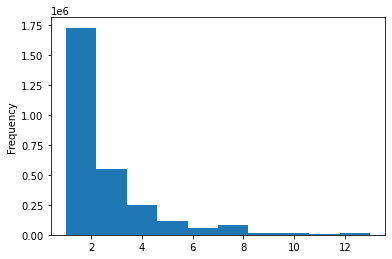

In [115]:
# typical nights
dfFeatures.cleannights.plot.hist()

<AxesSubplot:xlabel='numberofpeople', ylabel='cleannights'>

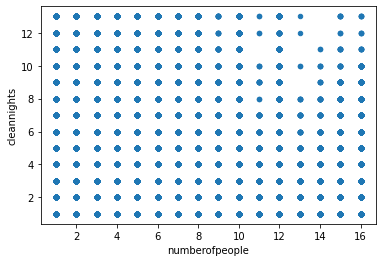

In [116]:
# plot people vs nights
dfFeatures.plot.scatter(x='numberofpeople', y='cleannights')

In [117]:
dfFeatures['numberofpeople'].describe(percentiles=[.2, .4, .6, .8])

count    2.835762e+06
mean     3.531266e+00
std      2.242261e+00
min      1.000000e+00
20%      2.000000e+00
40%      2.000000e+00
50%      3.000000e+00
60%      4.000000e+00
80%      5.000000e+00
max      1.600000e+01
Name: numberofpeople, dtype: float64

In [118]:
dfFeatures['numberofpeople'].max()

16

In [119]:
dfFeatures['cleannights'].describe(percentiles=[.2, .4, .6, .8])

count    2.835762e+06
mean     2.597731e+00
std      1.892861e+00
min      1.000000e+00
20%      1.000000e+00
40%      2.000000e+00
50%      2.000000e+00
60%      2.000000e+00
80%      3.000000e+00
max      1.300000e+01
Name: cleannights, dtype: float64

## Export Data

Export dataframe to three external CSV files:

- REC.csv - all features
- REC_Collaborative_Product.csv - a three column file with features for collaborative filitering, using `productid` as the item field
- REC_Collaborative_Facility.csv - a three column file with features for collaborative filitering, using `facility` as the item field

In [120]:
# use proposed features and export camping reservations
dfFeatures.to_csv('./data/REC.csv', index=False)

In [121]:
# export camping reservations for ALS and SVD
dfCollaborativeProduct = dfFeatures[['user', 'productid', 'rating']]
dfCollaborativeProduct.rename(columns={'productid': 'item'}, inplace=True)
dfCollaborativeProduct.to_csv('./data/REC_Collaborative_Product.csv', index=False)

/Users/natburgwyn/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [122]:
# export camping reservations for ALS and SVD
dfCollaborativeFacility = dfFeatures[['user', 'facilityid', 'rating']]
dfCollaborativeFacility.rename(columns={'facilityid': 'item'}, inplace=True)
dfCollaborativeFacility.to_csv('./data/REC_Collaborative_Facility.csv', index=False)